# Forest Fires Dataset:Predicting the fire area using LinearRegression

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv(r"forestfires.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       517 non-null    int64  
 1   Y       517 non-null    int64  
 2   month   517 non-null    object 
 3   day     517 non-null    object 
 4   FFMC    517 non-null    float64
 5   DMC     517 non-null    float64
 6   DC      517 non-null    float64
 7   ISI     517 non-null    float64
 8   temp    517 non-null    float64
 9   RH      517 non-null    int64  
 10  wind    517 non-null    float64
 11  rain    517 non-null    float64
 12  area    517 non-null    float64
dtypes: float64(8), int64(3), object(2)
memory usage: 52.6+ KB


In [3]:
data.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


## Data cleaning:
Before we start training and applying the model it is a must that we get to data cleaning:
* Deleting the duplicated rows.
* Reviewing the unexpected values for each categorical column.
* Dropping the null values(only for columns X and Y since 1<=X<=9 && 2<=Y<=9)

In [4]:
data.duplicated().count()

517

In [5]:
data.drop_duplicates(inplace=True)

In [6]:
data['month'].value_counts()

aug    182
sep    172
mar     53
jul     32
feb     20
jun     16
oct     15
apr      9
dec      9
jan      2
may      2
nov      1
Name: month, dtype: int64

In [7]:
data['day'].value_counts()

sun    94
fri    84
sat    83
mon    74
tue    64
thu    61
wed    53
Name: day, dtype: int64

In [8]:
data.dropna(subset=['X', 'Y'])

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,4,3,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44
513,2,4,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29
514,7,4,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16
515,1,4,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00


In order to choose the most effective standardization technique for FFMC,DMC,DC and ISI we have to make data visualizations to identify the distribution of each feature(it helps us in the pre processing step before training the model):

* DMC:

(array([36., 42., 42., 17., 49., 81., 59., 72., 29., 29.,  6., 11., 17.,
         7.,  3., 13.]),
 array([  1.1   ,  19.2375,  37.375 ,  55.5125,  73.65  ,  91.7875,
        109.925 , 128.0625, 146.2   , 164.3375, 182.475 , 200.6125,
        218.75  , 236.8875, 255.025 , 273.1625, 291.3   ]),
 <BarContainer object of 16 artists>)

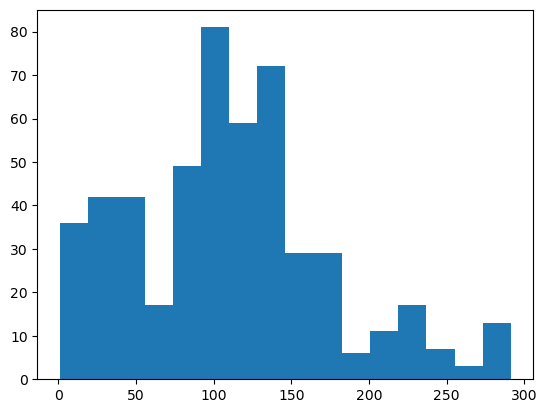

In [9]:
plt.hist(data['DMC'],bins='auto')

=> Standardization

* DC:

{'whiskers': [<matplotlib.lines.Line2D at 0x27c96745790>,
 'caps': [<matplotlib.lines.Line2D at 0x27c96745d30>,
 'boxes': [<matplotlib.lines.Line2D at 0x27c967454c0>],
 'medians': [<matplotlib.lines.Line2D at 0x27c96756310>],
 'fliers': [<matplotlib.lines.Line2D at 0x27c967565e0>],
 'means': []}

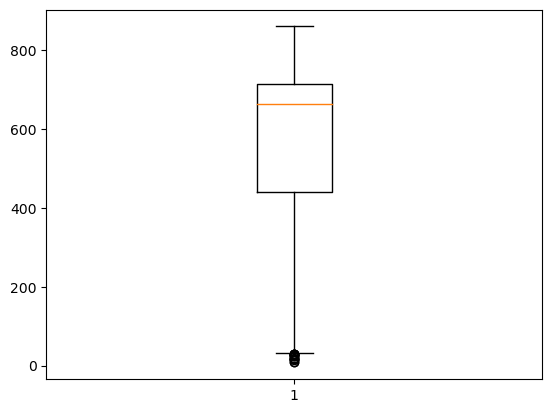

In [10]:
plt.boxplot(data['DC'])

=> We notice skewed distribution so the right tech to us is MinMaxScaler.

* FFMC:

{'whiskers': [<matplotlib.lines.Line2D at 0x27c967b56d0>,
 'caps': [<matplotlib.lines.Line2D at 0x27c967b5c70>,
 'boxes': [<matplotlib.lines.Line2D at 0x27c967b5400>],
 'medians': [<matplotlib.lines.Line2D at 0x27c967c0250>],
 'fliers': [<matplotlib.lines.Line2D at 0x27c967c0520>],
 'means': []}

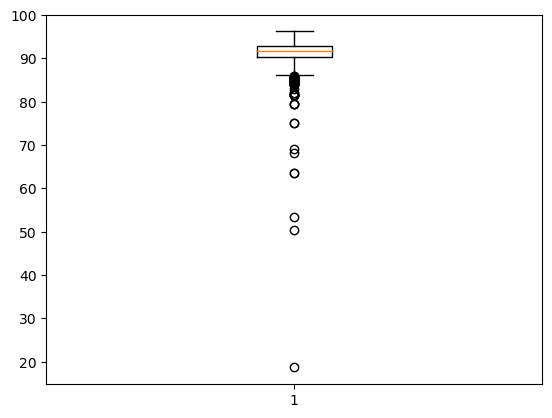

In [11]:
plt.boxplot(data['FFMC'])

=>standardization.

* ISI:

(array([ 83., 308.,  93.,  26.,   2.,   0.,   0.,   0.,   0.,   1.]),
 array([ 0.  ,  5.61, 11.22, 16.83, 22.44, 28.05, 33.66, 39.27, 44.88,
        50.49, 56.1 ]),
 <BarContainer object of 10 artists>)

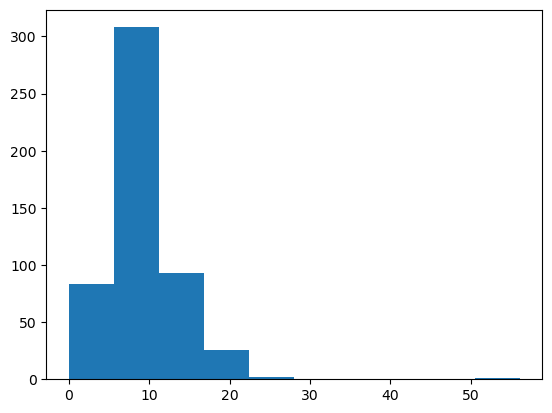

In [12]:
plt.hist(data['ISI'])

=> MinMaxScaler since the distribution is skewed to the right and there are more data points towards the lower values of ISI.

Now that the dataset is fully cleaned we move to the next step which is the pre-processing.

## Data pre-processing 

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [14]:
import warnings
warnings.filterwarnings('ignore')

We start by transforming the categorical variables

In [15]:
data['winter'] = (data['month'].isin(['dec', 'jan', 'feb'])) * 1
data['spring'] = (data['month'].isin(['mar', 'apr', 'may'])) * 1
data['summer'] = (data['month'].isin(['jun', 'jul', 'aug'])) * 1
data['fall'] = (data['month'].isin(['sep', 'oct', 'nov'])) * 1

In [16]:
data['1'] = (data['day'].isin(['mon'])) * 1
data['2'] = (data['day'].isin(['tue'])) * 1
data['3'] = (data['day'].isin(['thu'])) * 1
data['4'] = (data['day'].isin(['wed'])) * 1
data['5'] = (data['day'].isin(['fri'])) * 1
data['6'] = (data['day'].isin(['sat'])) * 1
data['7'] = (data['day'].isin(['sun'])) * 1

To not confuse our model we will delete month,day.

In [17]:
del data['month']
del data['day']

Now we move to scalling numerical data with the techniques found

In [18]:
features_to_scale = ['FFMC', 'DMC']
data_scaled = np.array([data[col] for col in features_to_scale]).T
scaler1 = StandardScaler()
scaler1.fit(data_scaled)

StandardScaler()

In [19]:
features_to_scale = ['ISI', 'DC']
data_scaled = np.array([data[col] for col in features_to_scale]).T  # Transpose for row-wise data
scaler2 = MinMaxScaler(feature_range=(0, 1)) 
scaler2.fit(data_scaled)

MinMaxScaler()

In [20]:
X = data.drop(columns=['area'])
y = data['area']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Training set shape (X):", X_train.shape)
print("Testing set shape (X):", X_test.shape)

Training set shape (X): (410, 21)
Testing set shape (X): (103, 21)


Introducing our model:
### LinearRegression

In [21]:
model = LinearRegression()

In [22]:
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [23]:
input_={
    'X': 5,
    'Y': 4,
    'month':'mar',
    'day':'mon',
    'FFMC':82.1,
    'DMC':32.1,
    'DC':667.9,
    'ISI':9.0,
    'temp':19,
    'RH':50,
    'wind':1.5,
    'rain':0.0
}
input_=pd.DataFrame([input_])
#applying the modifications needed on the input 
input_['1'] = (input_['day'].isin(['mon'])) * 1
input_['2'] = (input_['day'].isin(['tue'])) * 1
input_['3'] = (input_['day'].isin(['thu'])) * 1
input_['4'] = (input_['day'].isin(['wed'])) * 1
input_['5'] = (input_['day'].isin(['fri'])) * 1
input_['6'] = (input_['day'].isin(['sat'])) * 1
input_['7'] = (input_['day'].isin(['sun'])) * 1
input_['winter'] = (input_['month'].isin(['dec', 'jan', 'feb'])) * 1
input_['spring'] = (input_['month'].isin(['mar', 'apr', 'may'])) * 1
input_['summer'] = (input_['month'].isin(['jun', 'jul', 'aug'])) * 1
input_['fall'] = (input_['month'].isin(['sep', 'oct', 'nov'])) * 1
del input_['month']
del input_['day']
features_to_scale_scaler1 = ['FFMC', 'DMC']
features_to_scale_scaler2 = ['ISI', 'DC']
scaled_features = {}
# Apply scaling using scaler1
features_scaled = np.array([input_[col] for col in features_to_scale_scaler1]).T  # Transpose for row-wise data
scaled_features = scaler1.transform(features_scaled)
# Update DataFrame with scaled features
input_['FFMC'] = scaled_features[:, 0]
input_['DMC'] = scaled_features[:, 1]

# Apply scaling using scaler2
features_scaled1 = np.array([input_[col] for col in features_to_scale_scaler2]).T  # Transpose for row-wise data
scaled_features = scaler2.transform(features_scaled1)
# Update DataFrame with scaled features
input_['ISI'] = scaled_features[:, 0]
input_['DC'] = scaled_features[:, 1]

print(input_)

   X  Y    FFMC       DMC        DC       ISI  temp  RH  wind  rain  ...  2  \
0  5  4 -1.5423 -1.230177  0.774012  0.160428    19  50   1.5   0.0  ...  0   

   3  4  5  6  7  winter  spring  summer  fall  
0  0  0  0  0  0       0       1       0     0  

[1 rows x 21 columns]


In [24]:
predictions = model.predict(input_)
print("The area of fire predicted is:", predictions[0])

The area of fire predicted is: 10.33547257841689


In [25]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)

Mean Absolute Error (MAE): 16.069954694852612
Mean Squared Error (MSE): 506.96767869448007
Root Mean Squared Error (RMSE): 22.515942767170113


=>we notice that these metrics are showing that the model can predict results that are far from being realistic for example the mean squared error with an avg error around 22 units suggests few expected large errors contributed by the linearRegression model.